In [114]:

#Importing MNIST dataset
from keras.datasets import mnist
# The np_utils module provides utilities for converting data types and manipulating arrays.
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [115]:

#load_data : unpacks the data into tuples : (X_train, y_train) and (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [116]:
print(X_train[1].shape)

(28, 28)


In [117]:

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


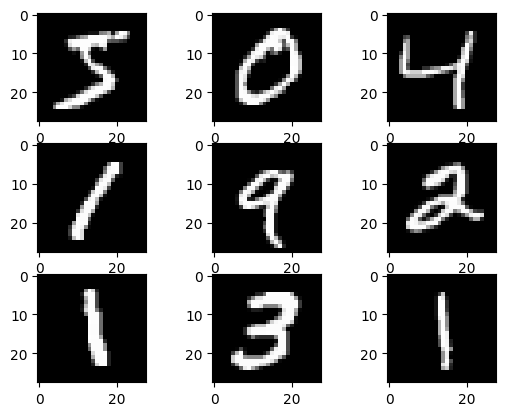

In [118]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [119]:
#shape : helps to view the dimensions of the input array
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [120]:

#shape : helps to view the dimensions of the numpy array
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [121]:
#convert 2d to 1d
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])


In [122]:
print(X_train[0])


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [123]:
#pixel values are typically represented as integers between 0 and 255,
#where 0 represents black and 255 represents white.
X_train = X_train/255
X_test = X_test/255

In [124]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [125]:

#Preprocessing
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [126]:

#One-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [127]:
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [128]:

#Building a model
from keras.models import Sequential
from keras.layers import Dense, Activation

In [129]:
#input_dim : number of features(columns) in the input data
#output_dim : there are 10 possible output classes, corresponding to the digits 0 to 9.
input_dim = X_train.shape[1] #784
output_dim = 10 #0-9


In [130]:

model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:

model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [132]:


#Fitting the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.2863 - accuracy: 0.6957 - val_loss: 0.8158 - val_accuracy: 0.8242
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7171 - accuracy: 0.8372 - val_loss: 0.6114 - val_accuracy: 0.8596
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5881 - accuracy: 0.8579 - val_loss: 0.5292 - val_accuracy: 0.8718
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5263 - accuracy: 0.8677 - val_loss: 0.4831 - val_accuracy: 0.8792
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4886 - accuracy: 0.8736 - val_loss: 0.4533 - val_accuracy: 0.8840
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4627 - accuracy: 0.8787 - val_loss: 0.4314 - val_accuracy: 0.8890
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.8818 - val_loss: 0.4148 - val_accuracy: 0.8921
Epoch 

In [133]:
#evaluates the trained neural network model on the testing data (X_test and Y_test)
#prints the test score and accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.33698439598083496
Test accuracy: 0.9075000286102295


313/313 [==============================] - 0s 1ms/step
[6.5188052e-04 7.1880487e-07 2.3687411e-04 1.6384298e-01 6.9685810e-04
 7.6638794e-01 2.4406747e-04 5.8959795e-06 6.7577824e-02 3.5491597e-04]
5


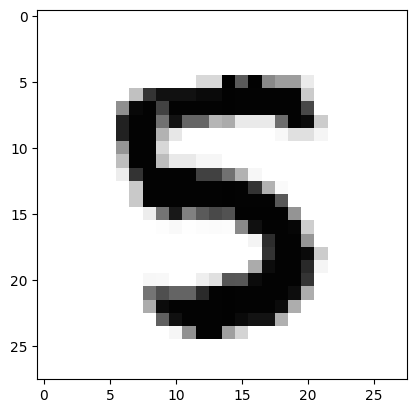

In [134]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [135]:

#constants for readability
NB_EPOCHS = 20
BATCH_SIZE = 128


In [136]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [137]:
#MLP+Sigmoid+ADAM optimizer
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.5283 - accuracy: 0.8647 - val_loss: 0.2473 - val_accuracy: 0.9281
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2210 - accuracy: 0.9357 - val_loss: 0.1821 - val_accuracy: 0.9452
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1647 - accuracy: 0.9515 - val_loss: 0.1465 - val_accuracy: 0.9565
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1275 - accuracy: 0.9623 - val_loss: 0.1263 - val_accuracy: 0.9620
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1008 - accuracy: 0.9707 - val_loss: 0.1045 - val_accuracy: 0.9677
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0806 - accuracy: 0.9764 - val_loss: 0.0879 - val_accuracy: 0.9715
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0670 - accuracy: 0.9798 - val_loss: 0.0818 - val_accuracy: 0.9727

In [138]:
#MLP+Sigmoid+ADAM optimizer
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0742 - val_accuracy: 0.9803
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0765 - val_accuracy: 0.9804
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0701 - val_accuracy: 0.9828
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0820 - val_accuracy: 0.9805
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0722 - val_accuracy: 0.9822
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0847 - val_accuracy: 0.9795
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0700 - val_accuracy: 0.9833

313/313 [==============================] - 1s 3ms/step
[1.6363385e-13 3.2262668e-11 1.6181951e-12 9.9999994e-01 2.4125844e-16
 1.2705127e-10 1.9669704e-15 4.5509000e-12 4.0976719e-12 1.6324216e-11]
3


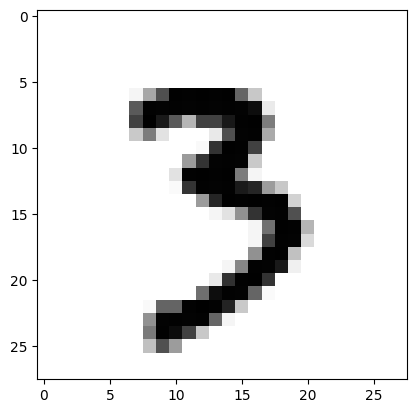

In [139]:
image_index = 30
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [140]:
#MLP+ReLu Activation+ADAM optimizer
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 128)               65664     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [141]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 8.5696e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9842
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 7.3288e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9844
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 6.4542e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9842
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 5.5851e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9849
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 4.9099e-05 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9844
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 4.3365e-05 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9842
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 3.9799e-05 - accuracy: 1.0000 - val_loss: 0

313/313 [==============================] - 1s 3ms/step
[0.07095931 0.12390666 0.0680396  0.1440797  0.10454932 0.11695579
 0.09273358 0.09586503 0.08990052 0.09301048]
3


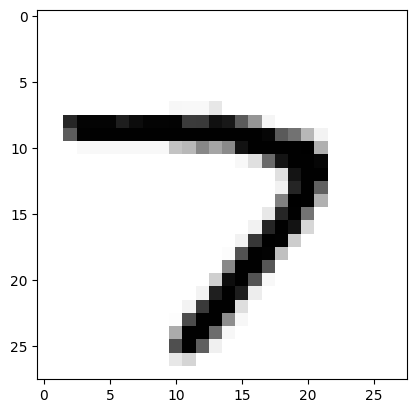

In [142]:
image_index = 70
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_relu.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [143]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
with strategy.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(16))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 128)               65664     
                                                                 
 dense_30 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step
[0.01995166 0.02504973 0.07944101 0.06799144 0.15513745 0.03800065
 0.19405223 0.16237937 0.21079595 0.04720051]
8


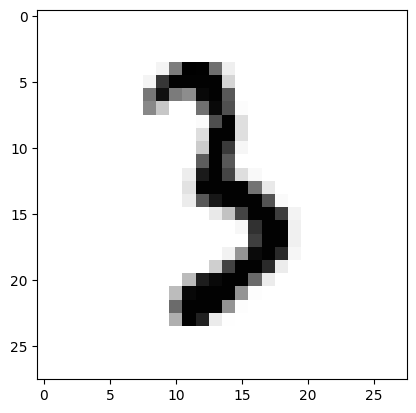

In [144]:

image_index = 44
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))